# Rede #1 Co-ocorrência de Princípios Ativos entre Medicamentos

In [62]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Importação do arquivo e tratamento dos dados

In [97]:
# Ler o dataset dados.csv
df = pd.read_csv('dados.csv', encoding='latin1', delimiter=';')
df.shape
df.head()

TIPO_PRODUTO                         NOME_PRODUTO DATA_FINALIZACAO_PROCESSO  \
0  MEDICAMENTO      (VITAMINAS A )  +  ASSSOCIACÕES                25/04/2000   
1  MEDICAMENTO   AC SALICILICO + AC BENZOICO + IODO                19/05/2000   
2  MEDICAMENTO                   ALENDRONATO SODICO                04/06/2001   
3  MEDICAMENTO                       ARNICA MONTANA                19/03/2002   
4  MEDICAMENTO                    ARNICA MONTANA L.                01/07/2002   

  CATEGORIA_REGULATORIA  NUMERO_REGISTRO_PRODUTO DATA_VENCIMENTO_REGISTRO  \
0               SIMILAR              104540166.0               01/04/2005   
1               SIMILAR              119350001.0               01/05/2005   
2               SIMILAR              100470305.0               01/05/2006   
3          FITOTERÁPICO              104730021.0               01/03/2007   
4          FITOTERÁPICO              131750004.0               01/06/2007   

   NUMERO_PROCESSO                CLASSE_TERAPEUTICA  \
0  250000254169821  VITAMINAS E SUPLEMENTOS MINERAIS   
1    2501017185899     ANTIMICOTICOS PARA USO TOPICO   
2  253510228050056   SUPRESSORES DA REABSORCAO OSSEA   
3    2502500782199              FITOTERAPICO SIMPLES   
4  253510326310184              FITOTERAPICO SIMPLES   

                          EMPRESA_DETENTORA_REGISTRO SITUACAO_REGISTRO  \
0  60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...  CADUCO/CANCELADO   
1  63826069000199 - LABORATORIO FLORA DA AMAZONIA...  CADUCO/CANCELADO   
2  61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...  CADUCO/CANCELADO   
3          92762277000170 - VIDORA FARMACÊUTICA LTDA  CADUCO/CANCELADO   
4  00925697000101 - LIMED LABORATORIO INDUSTRIAL ...  CADUCO/CANCELADO   

  PRINCIPIO_ATIVO  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [98]:
df = df.dropna()
df.head()
df.shape

(10768, 11)

In [99]:
df = df.drop(columns=['TIPO_PRODUTO', 'DATA_FINALIZACAO_PROCESSO', 'NUMERO_REGISTRO_PRODUTO', 'DATA_VENCIMENTO_REGISTRO', 'NUMERO_PROCESSO'])
df.head()

NOME_PRODUTO CATEGORIA_REGULATORIA  \
38  A SAÚDE DA MULHER                  NOVO   
42                AAS               SIMILAR   
45        AAS PROTECT               SIMILAR   
47               ABBA               SIMILAR   
50                ABC               SIMILAR   

                                   CLASSE_TERAPEUTICA  \
38  ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC  MED...   
42                         ANALGESICOS NAO NARCOTICOS   
45                          ANTIAGREGANTE PLAQUETARIO   
47                            AGENTES ANTINEOPLÁSICOS   
50                      ANTIMICOTICOS PARA USO TOPICO   

                           EMPRESA_DETENTORA_REGISTRO SITUACAO_REGISTRO  \
38                           57507378000365 - EMS S/A            VÁLIDO   
42  10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.            VÁLIDO   
45  10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.            VÁLIDO   
47   05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA            VÁLIDO   
50       92695691000103 - KLEY HERTZ FARMACEUTICA S.A            VÁLIDO   

                                      PRINCIPIO_ATIVO  
38  EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA +  E...  
42                             ACIDO ACETILSALICILICO  
45                             ÁCIDO ACETILSALICÍLICO  
47                             ACETATO DE ABIRATERONA  
50                                        CLOTRIMAZOL

In [72]:
# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós ao grafo, onde cada nó é um produto diferente
for produto in df['NOME_PRODUTO']:
    G.add_node(produto)

# Exibir o número de nós no grafo
print(f"Número de nós no grafo: {G.number_of_nodes()}")

Número de nós no grafo: 7453


## Construção da rede

In [73]:
# Criar um dicionário para mapear cada PRINCIPIO_ATIVO aos produtos correspondentes
principio_produtos = {}

for index, row in df.iterrows():
    principios = row['PRINCIPIO_ATIVO'].split('+')
    for principio in principios:
        principio = principio.strip()
        if principio not in principio_produtos:
            principio_produtos[principio] = set()
        principio_produtos[principio].add(row['NOME_PRODUTO'])

# Adicionar arestas entre produtos que compartilham pelo menos um PRINCIPIO_ATIVO
for produtos in principio_produtos.values():
    produtos = list(produtos)
    for i in range(len(produtos)):
        for j in range(i + 1, len(produtos)):
            G.add_edge(produtos[i], produtos[j])

# Exibir o número de arestas no grafo
print(f"Número de arestas no grafo: {G.number_of_edges()}")

Número de arestas no grafo: 91958


## Plot do grafo

/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


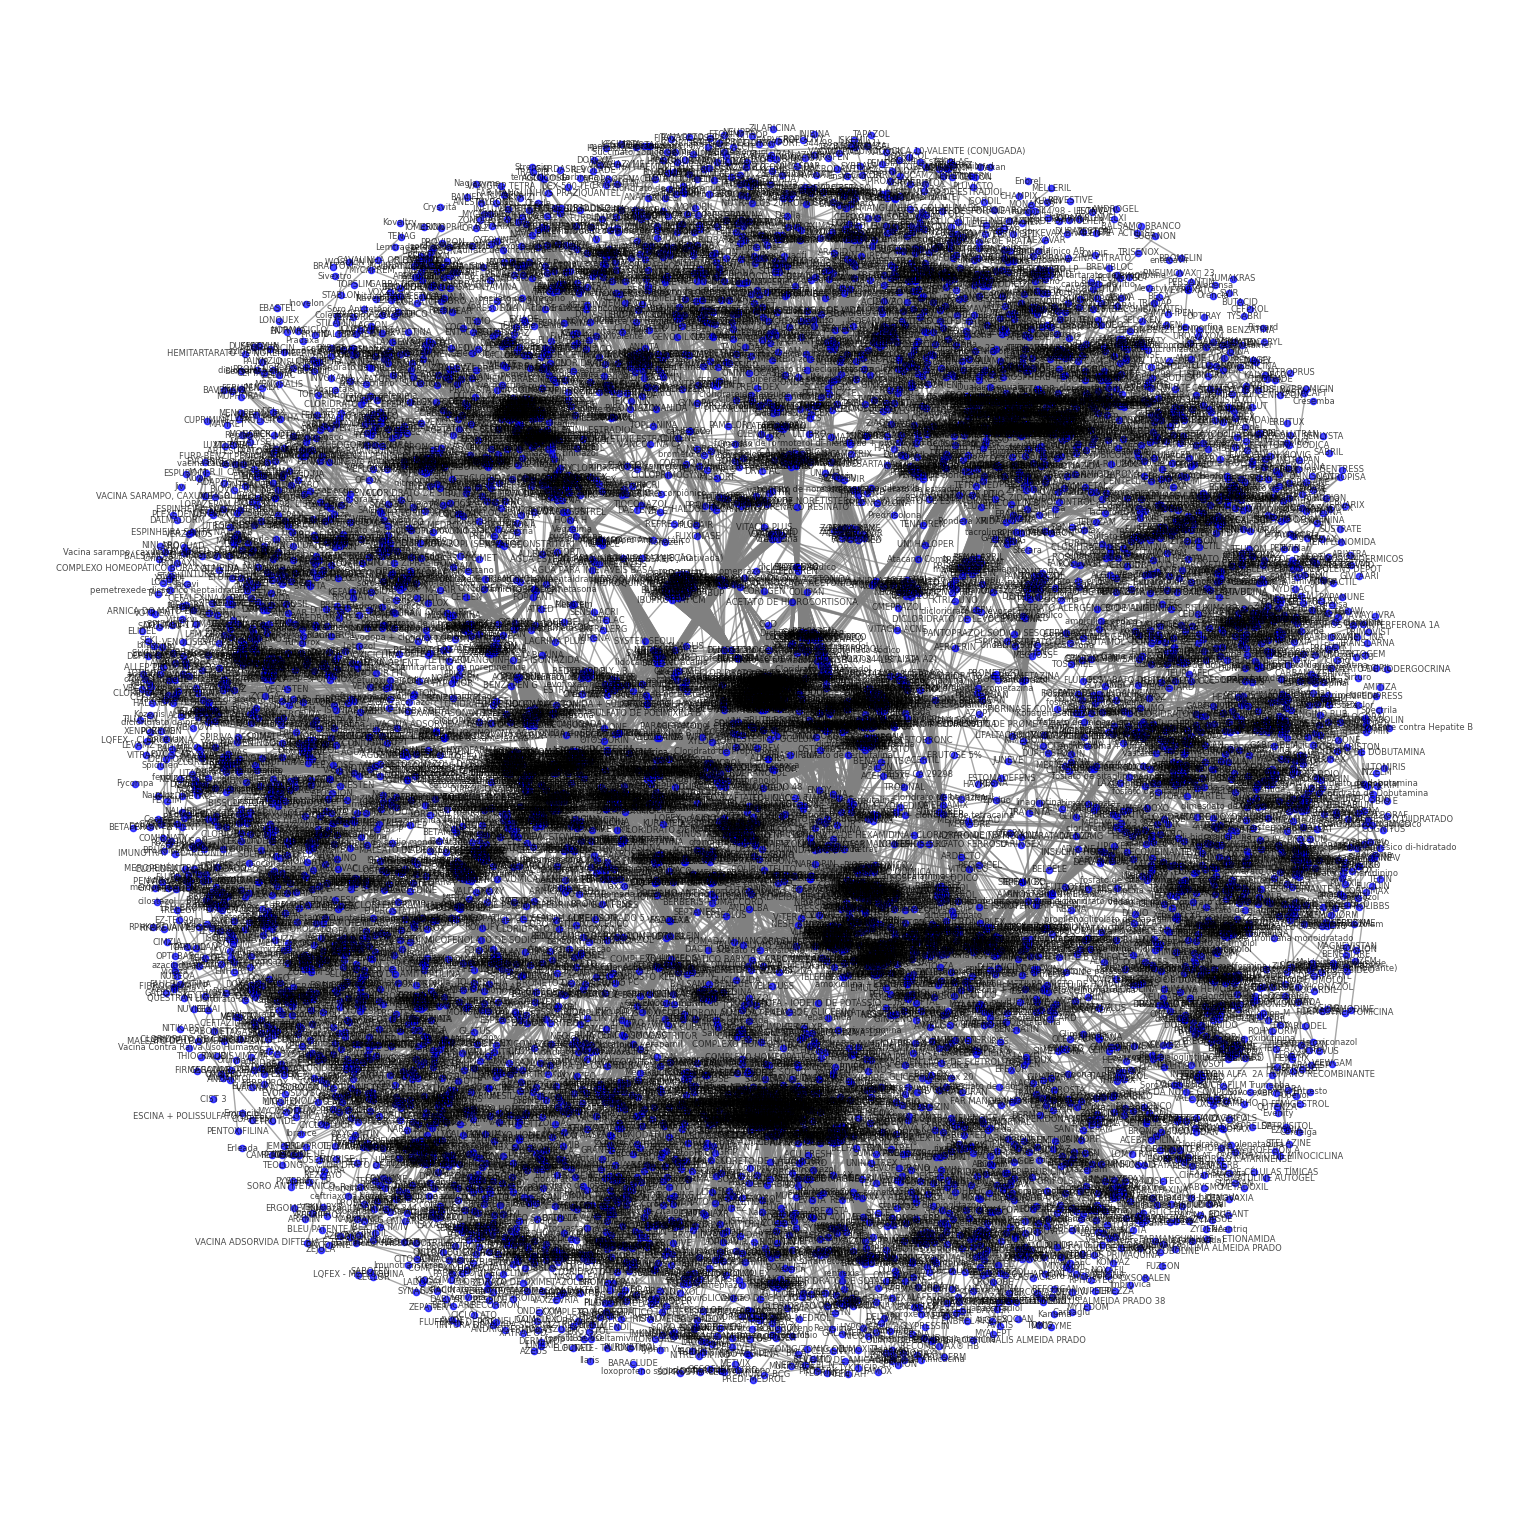

In [74]:
# Usar um layout apropriado
pos = nx.spring_layout(G, k=0.1)  # k é o parâmetro de repulsão entre os nós

# Ajustar o tamanho da figura
plt.figure(figsize=(15, 15))

# Desenhar o grafo com ajustes de estilo
nx.draw(G, pos, with_labels=True, node_size=20, font_size=6, edge_color='gray', node_color='blue', alpha=0.7)

# Mostrar o gráfico
plt.show()

## Cálculo da assortatividade baseada na categoria regulatória

In [77]:
# Adicionar a categoria regulatória como atributo dos nós no grafo
for index, row in df.iterrows():
    produto = row['NOME_PRODUTO']
    categoria = row['CATEGORIA_REGULATORIA']
    if G.has_node(produto):
        G.nodes[produto]['categoria_regulatoria'] = categoria

# Calcular a assortatividade baseada na categoria regulatória
assortatividade_categoria = nx.attribute_assortativity_coefficient(G, 'categoria_regulatoria')
print(f"Assortatividade baseada na categoria regulatória: {assortatividade_categoria}")

Assortatividade baseada na categoria regulatória: 0.3592261025491516


## Matriz da mistura de atributos

In [78]:
e = nx.attribute_mixing_matrix(G,'categoria_regulatoria')
e

array([[2.58813806e-03, 5.43726484e-06, 0.00000000e+00, 0.00000000e+00,
        7.23156223e-04, 1.19619826e-04, 1.03308032e-04, 0.00000000e+00],
       [5.43726484e-06, 2.95352226e-01, 1.03639705e-01, 5.43726484e-06,
        5.43726484e-06, 1.03906131e-02, 6.91021988e-02, 8.04715196e-04],
       [0.00000000e+00, 1.03639705e-01, 3.78759869e-02, 0.00000000e+00,
        0.00000000e+00, 2.03353705e-03, 2.49570456e-02, 2.17490594e-05],
       [0.00000000e+00, 5.43726484e-06, 0.00000000e+00, 5.32851954e-04,
        0.00000000e+00, 7.06844429e-05, 3.26235890e-05, 3.80608539e-05],
       [7.23156223e-04, 5.43726484e-06, 0.00000000e+00, 0.00000000e+00,
        2.92416103e-02, 3.53422214e-04, 2.17490594e-05, 0.00000000e+00],
       [1.19619826e-04, 1.03906131e-02, 2.03353705e-03, 7.06844429e-05,
        3.53422214e-04, 1.63096196e-01, 8.23745623e-03, 1.35931621e-04],
       [1.03308032e-04, 6.91021988e-02, 2.49570456e-02, 3.26235890e-05,
        2.17490594e-05, 8.23745623e-03, 1.97263968e-02, 8.

In [79]:
categorias_nas_arestas = set()
for u, v in G.edges():
    categorias_nas_arestas.add(G.nodes[u]['categoria_regulatoria'])
    categorias_nas_arestas.add(G.nodes[v]['categoria_regulatoria'])

print(categorias_nas_arestas)
print("Categorias faltantes:", set(df['CATEGORIA_REGULATORIA'].unique()) - categorias_nas_arestas)


{'DINAMIZADO', 'SIMILAR', 'GENÉRICO', 'RADIOFÁRMACO', 'FITOTERÁPICO', 'ESPECÍFICO', 'NOVO', 'BIOLÓGICO'}
Categorias faltantes: {'PRODUTO DE T'}


## Plot da matriz da mistura de atributos

Mapeamento de índices para categorias:
0: BIOLÓGICO
1: DINAMIZADO
2: ESPECÍFICO
3: FITOTERÁPICO
4: GENÉRICO
5: NOVO
6: RADIOFÁRMACO
7: SIMILAR


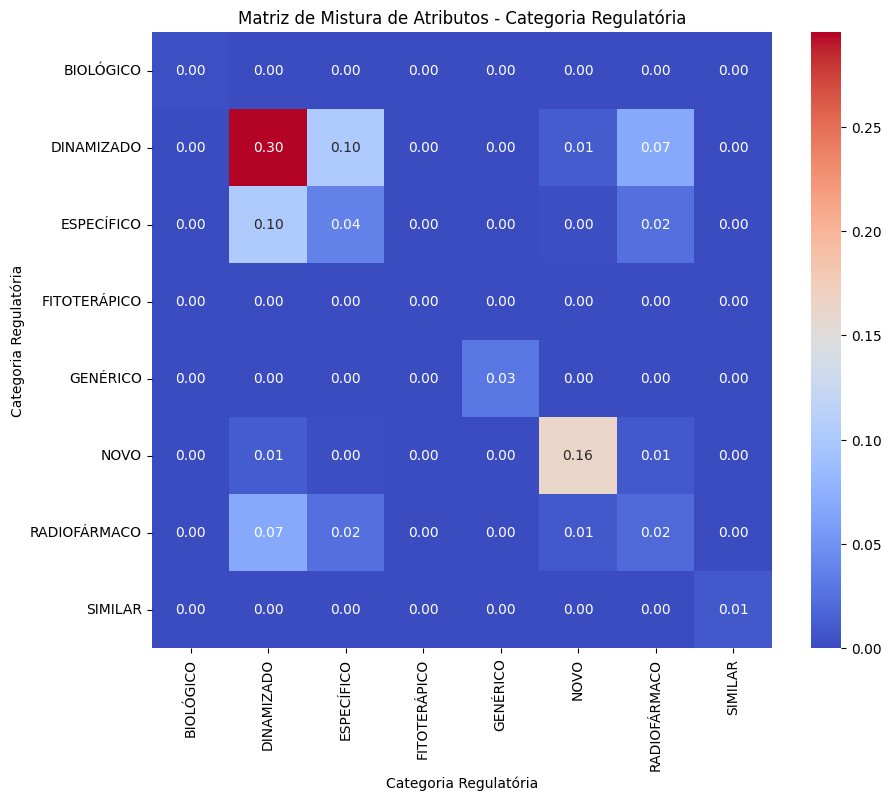

In [80]:
import seaborn as sns

# Remover nós com a categoria 'PRODUTO DE T'
categoria_remover = 'PRODUTO DE T'
nos_para_remover = [n for n, d in G.nodes(data=True) if d.get('categoria_regulatoria') == categoria_remover]
G.remove_nodes_from(nos_para_remover)

# Recalcular a matriz de mistura de atributos
e = nx.attribute_mixing_matrix(G, 'categoria_regulatoria')

# Obter os valores únicos do atributo 'categoria_regulatoria' após a remoção
categorias_unicas = list(set(nx.get_node_attributes(G, 'categoria_regulatoria').values()))

# Ordenar as categorias para garantir a correspondência correta
categorias_unicas.sort()

# Criar um dicionário para mapear índices para categorias
indice_para_categoria = {i: categoria for i, categoria in enumerate(categorias_unicas)}

# Exibir o mapeamento
print("Mapeamento de índices para categorias:")
for indice, categoria in indice_para_categoria.items():
    print(f"{indice}: {categoria}")

# Visualizar a matriz usando seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(e, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=categorias_unicas, yticklabels=categorias_unicas)
plt.title('Matriz de Mistura de Atributos - Categoria Regulatória')
plt.xlabel('Categoria Regulatória')
plt.ylabel('Categoria Regulatória')
plt.show()

In [81]:
# Exibir a soma de todos os valores da matriz
print('Soma de todos os valores da matriz:', np.sum(e))

Soma de todos os valores da matriz: 1.0
